In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
from afinn import Afinn
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

In [2]:
# data load
data=pd.read_excel("C:\\Users\\Yuyeon PARK\\Desktop\\21삼성카드공모전\\데이터\\공모전_제공_데이터(1차).xlsx", sheet_name=0, engine="openpyxl")

In [3]:
data.rename(columns = {'최종분류(우선순위 가장 높은것 선택)' : '최종분류'}, inplace = True)

In [4]:
numbering=pd.read_excel("C:\\Users\\Yuyeon PARK\\Desktop\\21삼성카드공모전\\데이터\\공모전_제공_데이터(1차).xlsx", sheet_name=1, engine="openpyxl")

In [5]:
numbering.rename(columns = {'의도명(유형)' : '최종분류'}, inplace = True)

In [6]:
dat=pd.merge(data, numbering, how='inner', on='최종분류')

In [7]:
dat = dat.drop(dat.columns[[5,6,7,8]], axis=1) 
dat

,NO,NO2,발화,발화1,발화1의 우선순위,최종분류,우선순위
0,1,6438,상담직원과 빠른연결했슴좋겠어요,불만>고객서비스>상담시스템,5,불만>고객서비스>상담시스템,5
1,2,6850,안기다리고. 빨리상담되었음좋겠다,불만>고객서비스>상담시스템,5,불만>고객서비스>상담시스템,5
2,3,7294,너무 오래기다리고 상담이 늦어져요,불만>고객서비스>상담시스템,5,불만>고객서비스>상담시스템,5
3,4,9484,상담직원과 통화가 매우 힘들다,불만>고객서비스>상담시스템,5,불만>고객서비스>상담시스템,5
4,5,10350,상담받으려면오래기다리는게불편함,불만>고객서비스>상담시스템,5,불만>고객서비스>상담시스템,5
...,...,...,...,...,...,...,...
995,9958,103,카드분실된지 1분만에 카드를 통해서 연락받아 바로 찾았어요 잃어버린지도 몰랐는데 감...,칭찬>삼성카드>카드상품,11,칭찬>삼성카드>카드상품,11
996,9961,2,수시로 6개월무이자할부와 링크혜택이 다른카드와 구별되는 기능이 편리함,칭찬>삼성카드>혜택,7,칭찬>삼성카드>혜택,7
997,9962,4,무이자할부 자주 많이 주셔서감사합니다,칭찬>삼성카드>혜택,7,칭찬>삼성카드>혜택,7
998,9963,5,무이자혜택만족긴할부만족잘쓰고있습니다,칭찬>삼성카드>혜택,7,칭찬>삼성카드>혜택,7


In [8]:
# 띄어쓰기 수정
from pykospacing import Spacing
spacing = Spacing()
    
rev1=[]
for i in range(len(dat)):
    new_sent=dat['발화'][i]

    kospacing_sent = spacing(new_sent) 
    rev1.append(kospacing_sent)

In [9]:
dat['rev1'] = rev1

In [10]:
# 정규 표현식 함수 정의: 특수문자 제거

import re

def apply_regular_expression(text):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')  # 한글 추출 규칙: 띄어 쓰기(1 개)를 포함한 한글
    result = hangul.sub('', text)  # 위에 설정한 "hangul"규칙을 "text"에 적용(.sub)시킴
    return result

In [11]:
rev2=[]
for i in range(len(dat)):
    rev2.append(apply_regular_expression(dat['rev1'][i]))

In [12]:
dat['rev2'] = rev2 # 정규표현식을 이용한 형태소 리스트.

In [13]:
# 단어의 빈도를 보고 불용어를 추가 해야겠다.

In [14]:
# 말뭉치 생성
corpus = "".join(dat['rev2'].tolist())
corpus

'상담직원과 빠른 연결했슴 좋겠어요안기다리고 빨리 상담되었음 좋겠다너무 오래 기다리고 상담이 늦어져요상담직원과 통화가 매우 힘들다상담받으려면 오래 기다리는 게 불편함상담하려면 많이 기다려야 하는 게 불편합니다상담원이 통화 중이라 많이 기다려야 해요상담직원과의 연결이 빠르게 연결되면 촣겠습니다상담직원 넘많이 기다려야 하는 불편해요상담원 통화가 너 믜 힘듬상담원과의 연결이 빨리 되었으면 감사 힘니다상담원이 영결이 많이 힘이듬번 질문에 대한 답변은 상담직원 연결되기까지 기다리는 것 말곤 없는 듯상담을 하려면 좀 많이 기다려야 상담사분이 나오셔서 그게 좀 불편하네요 상담이 다시 생겼으면상담하려 하는 기다리는 시간 너무 길다상담직원과 빠른 속도로 연결이 되길 원합니다상담직원과 빠른 연결부탁드립니다상담직원과 통화하기가 힘들다상담 한 번 받을려면 보통 분 이상 대기해야 실질상담은 분 미만인데직원 상담 시간 너무 지연됨 짜증 유발상담톡이 부족상담사와 연결 부분이 어려웠어요톡 상담 인원을 늘려주세요요즘 같은 때에는 전화 상담보다 톡 상담이 더 신속하고 일 처리가 빠른 데 인원이 너무 적은 듯매번 기 다리다 일 처리 못하고 그냥 지나간 적이 한 두 번이 아닙니다 지동응답 불필요한 안내 축소 상담직원과 빠른 연결을 원합니다 추석 연휴 잘 보내세요 상담원과의 대화 까지 소요되는 시간이 길어서 힘들었음  삼성카드사의 직원과 면 대면하여 질문답변이 되길 수 있으면 좋겠습니다문자 상담이나 온라인 상담이 가능한 부분이 많아졌으면 좋겠습니다상담 직원과 연결이 좀 신속 했으면 좋겟네요상담번호를 남겼는데 너무 늦게 주심이 넘 불만입니다상담직원 대기시간이 짫았으면 한다고객 입장에선 통화하기가 쉬웠으면 합니다 전용 상담원이 잇엇으면ㅠㅠ 전화상담 좀 빠르게 되었으면 좋겠어용상당 직원 연결이 잘 안 됨상담원 연결이 정말 힘들었다고객이 기다리지 않게 안내 직원 확대 부탁합니다상담원 연결이 어려워 요ㅠㅠ 번 이상 시도 해야 함주말에도 시 상담사 연결 직접 되었으면골드 회원 전용 전화 상담원 비치되어 있 

In [15]:
# 정규 표현식 적용
apply_regular_expression(corpus)

'상담직원과 빠른 연결했슴 좋겠어요안기다리고 빨리 상담되었음 좋겠다너무 오래 기다리고 상담이 늦어져요상담직원과 통화가 매우 힘들다상담받으려면 오래 기다리는 게 불편함상담하려면 많이 기다려야 하는 게 불편합니다상담원이 통화 중이라 많이 기다려야 해요상담직원과의 연결이 빠르게 연결되면 촣겠습니다상담직원 넘많이 기다려야 하는 불편해요상담원 통화가 너 믜 힘듬상담원과의 연결이 빨리 되었으면 감사 힘니다상담원이 영결이 많이 힘이듬번 질문에 대한 답변은 상담직원 연결되기까지 기다리는 것 말곤 없는 듯상담을 하려면 좀 많이 기다려야 상담사분이 나오셔서 그게 좀 불편하네요 상담이 다시 생겼으면상담하려 하는 기다리는 시간 너무 길다상담직원과 빠른 속도로 연결이 되길 원합니다상담직원과 빠른 연결부탁드립니다상담직원과 통화하기가 힘들다상담 한 번 받을려면 보통 분 이상 대기해야 실질상담은 분 미만인데직원 상담 시간 너무 지연됨 짜증 유발상담톡이 부족상담사와 연결 부분이 어려웠어요톡 상담 인원을 늘려주세요요즘 같은 때에는 전화 상담보다 톡 상담이 더 신속하고 일 처리가 빠른 데 인원이 너무 적은 듯매번 기 다리다 일 처리 못하고 그냥 지나간 적이 한 두 번이 아닙니다 지동응답 불필요한 안내 축소 상담직원과 빠른 연결을 원합니다 추석 연휴 잘 보내세요 상담원과의 대화 까지 소요되는 시간이 길어서 힘들었음  삼성카드사의 직원과 면 대면하여 질문답변이 되길 수 있으면 좋겠습니다문자 상담이나 온라인 상담이 가능한 부분이 많아졌으면 좋겠습니다상담 직원과 연결이 좀 신속 했으면 좋겟네요상담번호를 남겼는데 너무 늦게 주심이 넘 불만입니다상담직원 대기시간이 짫았으면 한다고객 입장에선 통화하기가 쉬웠으면 합니다 전용 상담원이 잇엇으면ㅠㅠ 전화상담 좀 빠르게 되었으면 좋겠어용상당 직원 연결이 잘 안 됨상담원 연결이 정말 힘들었다고객이 기다리지 않게 안내 직원 확대 부탁합니다상담원 연결이 어려워 요ㅠㅠ 번 이상 시도 해야 함주말에도 시 상담사 연결 직접 되었으면골드 회원 전용 전화 상담원 비치되어 있 

In [41]:
# 전체 말뭉치(corpus)에서 명사 형태소 추출
okt = Okt()
nouns = okt.nouns(apply_regular_expression(corpus))
print(nouns)

['상담', '직원', '슴', '다리', '상담', '상담', '상담', '직원', '통화', '매우', '상담', '게', '상담', '게', '상담', '통화', '중이', '해', '상담', '직원', '연결', '연결', '촣', '상담', '직원', '상담', '통화', '너', '믜', '상담', '연결', '감사', '힘니', '상담', '영결', '힘', '이듬', '번', '질문', '대한', '답변', '상담', '직원', '연결', '것', '듯', '상담', '좀', '상담사', '그게', '좀', '상담', '다시', '상담', '시간', '상담', '직원', '속도', '연결', '상담', '직원', '연결', '상담', '직원', '통화', '상담', '번', '보통', '분', '이상', '대기', '실질', '상담', '분', '미만', '직원', '상담', '시간', '지연', '짜증', '유발', '상담', '톡', '부족', '상담사', '연결', '부분', '톡', '상담', '인원', '요즘', '때', '전화', '상담', '톡', '상담', '더', '일', '처리', '데', '인원', '듯', '매번', '기', '다리', '일', '처리', '못', '그냥', '적', '두', '번', '응답', '안내', '축소', '상담', '직원', '연결', '추석', '연휴', '상담', '대화', '소요', '시간', '삼성', '카드', '사의', '직원', '면', '대면', '질문', '답변', '수', '문자', '상담', '온라인', '상담', '부분', '상담', '직원', '연결', '좀', '신속', '상담', '번호', '주심', '불만', '상담', '직원', '시간', '짫았으', '고객', '입장', '통화', '전용', '상담', '잇엇으', '전화', '상담', '좀', '상당', '직원', '연결', '안', '상담', '연결', '정말', '고객', '안내', '직원', '확대', '부탁

In [45]:
# 빈도 탐색
from collections import Counter
counter = Counter(nouns)

In [46]:
counter.most_common(20)

[('상담', 485),
 ('연결', 128),
 ('통화', 100),
 ('시간', 99),
 ('카드', 88),
 ('감사', 86),
 ('화면', 84),
 ('직원', 76),
 ('친절', 75),
 ('고객', 62),
 ('것', 52),
 ('상담사', 48),
 ('전화', 47),
 ('대기', 45),
 ('더', 45),
 ('회비', 40),
 ('좀', 37),
 ('설명', 37),
 ('때', 36),
 ('터치', 36)]

In [47]:
# 한 글자 명사 제거
available_counter = Counter({x: counter[x] for x in counter if len(x) > 1})
available_counter.most_common(20)

[('상담', 485),
 ('연결', 128),
 ('통화', 100),
 ('시간', 99),
 ('카드', 88),
 ('감사', 86),
 ('화면', 84),
 ('직원', 76),
 ('친절', 75),
 ('고객', 62),
 ('상담사', 48),
 ('전화', 47),
 ('대기', 45),
 ('회비', 40),
 ('설명', 37),
 ('터치', 36),
 ('안내', 34),
 ('응대', 34),
 ('처리', 33),
 ('답변', 31)]

In [21]:
# 불용어
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

stop_words = pd.read_csv("C:\\Users\\Yuyeon PARK\\Desktop\\21삼성카드공모전\\불용어.txt",header=None)
add_stop_words=['상담','연결','통화','시간','카드','화면','직원','고객','상담사','전화','대기','회비','설명','안내','응대','처리','답변']
stop_words = stop_words.append(add_stop_words)

In [28]:
stop_words

,0
0,아
1,휴
2,아이구
3,아이쿠
4,아이고
...,...
12,설명
13,안내
14,응대
15,처리


In [29]:
#시간, 응대 라는 단어 뒤에 긍정이 올지 부정이 올지를 계산해보자.

In [17]:
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

C:\Users\Yuyeon PARK\anaconda3\envs\test3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [32]:
# 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)
okt = Okt()
tokenized_data = []
for sentence in dat['rev2']:
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stop_words] # 불용어 제거
    tokenized_data.append(temp_X)

In [33]:
from gensim.models import Word2Vec
model = Word2Vec(sentences = tokenized_data, window = 5, min_count = 5, workers = 4, sg = 0)

In [33]:
model.wv.vectors.shape

(282, 100)

In [34]:
print(model.wv.most_similar("응대"))

[('가', 0.9992284178733826), ('하다', 0.9991863965988159), ('을', 0.9991834163665771), ('화면', 0.9991632699966431), ('은', 0.9991592764854431), ('카드', 0.9991589784622192), ('이', 0.9991545081138611), ('상담', 0.9991511106491089), ('있다', 0.9991382956504822), ('로', 0.999112069606781)]


In [35]:
print(model.wv.most_similar("시간"))

[('하다', 0.9992737174034119), ('이', 0.9992494583129883), ('은', 0.9992381930351257), ('를', 0.9992063045501709), ('것', 0.9991369247436523), ('을', 0.9991235733032227), ('너무', 0.9990642070770264), ('게', 0.9990522861480713), ('없다', 0.9990383386611938), ('되다', 0.9990379214286804)]


In [36]:
# 응대, 시간 넣어도 될 듯.
# 다시 올라가서 불용어 추가하기.

In [37]:
# 불용어 빼서 다시 데이터 정리하기.

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')  # 정규 표현식 처리
    result = hangul.sub('', text)
    okt = Okt()  # 형태소 추출
    nouns = okt.nouns(result)
    nouns = [x for x in nouns if len(x) > 1]  # 한글자 키워드 제거
    nouns = [x for x in nouns if x not in stop_words]  # 불용어 제거
    return nouns

vect = CountVectorizer(tokenizer = lambda x: text_cleaning(x))
bow_vect = vect.fit_transform(dat['rev2'].tolist())
word_list = vect.get_feature_names()
count_list = bow_vect.toarray().sum(axis=0)

In [31]:
word_list

['가기',
 '가끔',
 '가능',
 '가능성',
 '가요',
 '가입',
 '가장',
 '가족',
 '가지',
 '가타',
 '각각',
 '감동',
 '감사',
 '감안',
 '감염',
 '감정',
 '강요',
 '강화',
 '개선',
 '개월',
 '개인정보',
 '거나',
 '거의',
 '건강',
 '것임',
 '결론',
 '결재',
 '결제',
 '경우',
 '경청',
 '경향',
 '경험',
 '계설',
 '계속',
 '계심',
 '계좌',
 '고객',
 '고급',
 '고마움',
 '고생',
 '고전',
 '곧바로',
 '골드',
 '골절',
 '공감',
 '공부',
 '공휴일',
 '과정',
 '관련',
 '관리',
 '광고',
 '괜시리',
 '교육',
 '구경만',
 '구매',
 '구별',
 '구성',
 '구입',
 '구체',
 '구현',
 '국민',
 '국민카드',
 '권유',
 '권한',
 '그것',
 '그게',
 '그냥',
 '그대로',
 '근무',
 '근저당',
 '글쎄요',
 '글씨',
 '금사항',
 '금세',
 '긍지',
 '기간',
 '기계',
 '기네',
 '기능',
 '기다림',
 '기대',
 '기본',
 '기분',
 '기사',
 '기억',
 '기업',
 '기업인',
 '기재',
 '기존',
 '기초',
 '기침',
 '기타',
 '길댜',
 '김치냉장고',
 '꼼수',
 '꿑났는',
 '나왓으',
 '나이',
 '나중',
 '날짜',
 '납부',
 '내내',
 '내면',
 '내용',
 '넘먾아',
 '년도',
 '년령층',
 '노력',
 '노인',
 '누가',
 '누구',
 '누루',
 '누르기',
 '눌로',
 '느낌',
 '다른',
 '다리',
 '다만',
 '다소',
 '다시',
 '다음',
 '다이슨',
 '단계',
 '단기',
 '단축키',
 '담당',
 '답변',
 '답안',
 '답장',
 '당한',
 '당황',
 '대기',
 '대답',
 '대면',
 '대시',
 '대신',
 '대응',
 '대출',
 '대하',
 

In [40]:
# 각 단어가 전체 리뷰중에 등장한 총 횟수
count_list

array([  1,   4,   1,   1,   1,   1,   5,   1,   3,   1,   1,   7,  86,
         1,   1,   1,   1,   1,   4,   2,   1,   1,   1,   2,   1,   1,
         1,   1,   8,   1,   1,   3,   1,   5,   1,   1,  62,   1,   2,
         2,   1,   2,   9,   1,   2,   4,   2,   2,   2,   2,   4,   1,
         6,   1,   1,   1,   2,   2,   1,   1,   1,   4,   2,   1,   2,
         2,   4,   2,   2,   1,   1,   1,   1,   1,   1,   3,   3,   1,
         2,   1,   1,   1,  23,   1,   5,   1,   1,   1,   2,   1,   1,
         1,   1,   1,   1,   1,   1,   3,   2,   1,   3,   2,   1,  30,
         1,   1,   1,   1,   2,   1,   1,   2,   1,   1,  11,  30,   1,
         1,   2,  12,   1,   1,   1,   1,   1,   3,  31,   1,   1,   1,
         1,  44,   8,   1,   1,   1,   4,   6,   2,   8,   1,  10,   5,
         5,   1,   1,   1,   4,   1,   1,   2,   1,   2,   1,   1,   1,
         1,   1,   1,   2,  15,   4,   4,   1,   1,   1,   1,   1,   2,
         1,   7,   1,   1,   1,   1,   5,   1,   2,   1,   1,   

In [41]:
# 각 단어의 리뷰별 등장 횟수
bow_vect.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [42]:
bow_vect.shape

(1000, 715)

In [50]:
# "단어" - "총 등장 횟수" Matching
word_count_dict = dict(zip(word_list, count_list))
word_count_dict
words=dict(available_counter.most_common())

In [44]:
# TF-IDF 변환
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_vectorizer = TfidfTransformer()
tf_idf_vect = tfidf_vectorizer.fit_transform(bow_vect)

In [45]:
print(tf_idf_vect.shape)

(1000, 715)


In [46]:
# 첫 번째 리뷰에서의 단어 중요도(TF-IDF 값) -- 0이 아닌 것만 출력
print(tf_idf_vect[0])

  (0, 578)	0.8911035898615449
  (0, 312)	0.45379994726296236


In [47]:
# 첫 번째 리뷰에서 모든 단어의 중요도 -- 0인 값까지 포함
print(tf_idf_vect[0].toarray().shape)
print(tf_idf_vect[0].toarray())

(1, 715)
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.     

In [48]:
# 벡터와 단어 매핑
vect.vocabulary_

{'상담': 312,
 '직원': 578,
 '통화': 638,
 '매우': 191,
 '중이': 563,
 '연결': 422,
 '감사': 12,
 '힘니': 714,
 '영결': 430,
 '이듬': 465,
 '질문': 583,
 '대한': 139,
 '답변': 126,
 '상담사': 313,
 '그게': 65,
 '다시': 119,
 '시간': 354,
 '속도': 345,
 '보통': 257,
 '이상': 469,
 '대기': 131,
 '실질': 372,
 '미만': 222,
 '지연': 573,
 '짜증': 586,
 '유발': 454,
 '부족': 272,
 '부분': 267,
 '인원': 484,
 '요즘': 443,
 '전화': 525,
 '처리': 597,
 '매번': 190,
 '다리': 116,
 '그냥': 66,
 '응답': 459,
 '안내': 382,
 '축소': 613,
 '추석': 611,
 '연휴': 427,
 '대화': 142,
 '소요': 344,
 '삼성': 309,
 '카드': 621,
 '사의': 305,
 '대면': 133,
 '문자': 216,
 '온라인': 436,
 '신속': 364,
 '번호': 243,
 '주심': 558,
 '불만': 280,
 '짫았으': 587,
 '고객': 36,
 '입장': 493,
 '전용': 521,
 '잇엇으': 494,
 '상당': 315,
 '정말': 533,
 '확대': 703,
 '부탁': 274,
 '시도': 359,
 '주말': 556,
 '직접': 579,
 '골드': 42,
 '회원': 709,
 '비치': 293,
 '운영': 447,
 '공휴일': 46,
 '이용': 472,
 '업무': 405,
 '비상': 291,
 '배치': 239,
 '실시간': 371,
 '채팅': 594,
 '기다림': 79,
 '좋겠슴': 552,
 '지체': 575,
 '조금': 547,
 '다른': 115,
 '경우': 28,
 '사도': 296,
 '마찬가지': 176,
 '

In [49]:
invert_index_vectorizer = {v: k for k, v in vect.vocabulary_.items()}
print(str(invert_index_vectorizer)[:100]+'...') # 아니근데, 불용어 사전에 추가한거 왜 안빠짐,,?

{312: '상담', 578: '직원', 638: '통화', 191: '매우', 563: '중이', 422: '연결', 12: '감사', 714: '힘니', 430: '영결', 4...


In [50]:
# categorization 될까,,?
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [58]:
from afinn import Afinn
from sklearn.feature_extraction.text import TfidfVectorizer

In [53]:
# train, test set 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tf_idf_vect, dat['우선순위'], test_size= 0.2, random_state=1234)

In [54]:
print(X_train[0])
print(y_train[0])

  (0, 82)	1.0
5


In [86]:
X_train.shape

(800, 715)

In [56]:
### 실험을 해보자. 대체 왜 X_train 값이 대입이 안되냐?

In [85]:
vect1 = CountVectorizer(tokenizer = lambda x: text_cleaning(x))
bow_vect1 = vect.fit_transform(X_train[:].tolist())
word_list1 = vect.get_feature_names()
count_list1 = bow_vect.toarray().sum(axis=0)

IndexError: Index dimension must be <= 2

In [60]:
# TF-IDF 변환
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_vectorizer1 = TfidfTransformer()
tf_idf_vect1 = tfidf_vectorizer.fit_transform(bow_vect1)

NameError: name 'bow_vect1' is not defined

In [151]:
print(tf_idf_vect1.shape)

(800, 626)


In [61]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [62]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
encoded = tokenizer.texts_to_sequences(X_train)
padded = pad_sequences(encoded)
padded

NameError: name 'Tokenizer' is not defined

In [180]:
padded = pad_sequences(encoded, padding = 'post', maxlen = 44)
padded

array([[ 381,  657,  658, ...,    0,    0,    0],
       [ 662,  663,    2, ...,    0,    0,    0],
       [  39,   39,  664, ...,    0,    0,    0],
       ...,
       [ 339,    3,  579, ...,    0,    0,    0],
       [  44,    1,    0, ...,    0,    0,    0],
       [   4, 2330,    1, ...,    0,    0,    0]])

In [ ]:
############

<AxesSubplot:xlabel='우선순위', ylabel='count'>

C:\Users\Yuyeon PARK\anaconda3\envs\test3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50864 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Yuyeon PARK\anaconda3\envs\test3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Yuyeon PARK\anaconda3\envs\test3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49692 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Yuyeon PARK\anaconda3\envs\test3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Yuyeon PARK\anaconda3\envs\test3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 50864 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Yuyeon PARK\anaconda3\envs\test3\

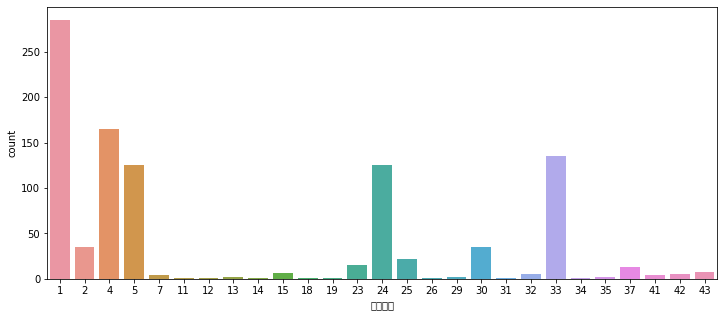

In [63]:
import seaborn as sns
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(12,5)
sns.countplot(dat['우선순위'])

In [64]:
def rating_to_label(priority):
    if (priority > 3 |priority <7) or (priority >24 | priority<43):
        return 1 # 불만
    elif priority < 4 or (priority <25 | priority >6) :
        return 2 # 칭찬
    elif priority==43 :
        return 0 # 중립
    else :
        return 3 # 폐기
    
dat['emotion'] = dat['우선순위'].apply(lambda x: rating_to_label(x)) 
# 불만 칭찬 중립 폐기 4개로 나누는건 됨. 이걸 44개에 어케 적용시키느냐,,가 문제,,?

In [65]:
# softmax regression을 써보자.

In [66]:
print("우선순위:", dat["우선순위"].unique(), sep="\n")

우선순위:
[ 5  4 42 41 37 35 34 33 32 31 30 29 26 25 43  2  1 24 23 19 18 15 14 13
 12 11  7]


In [67]:
from sklearn.model_selection import train_test_split
data_X = dat['rev1'].values # X 데이터에 해당됩니다. X는 총 1개입니다.
data_y = dat['우선순위'].values # Y 데이터에 해당됩니다. 예측해야하는 값입니다.

print(data_X[:5]) #X에 해당되는 데이터를 10개만 출력합니다.
print(data_y[:5]) #y에 해당되는 데이터를 10개만 출력합니다.

['상담직원과 빠른 연결했슴 좋겠어요' '안기다리고. 빨리 상담되었음 좋겠다' '너무 오래 기다리고 상담이 늦어져요'
 '상담직원과 통화가 매우 힘들다' '상담받으려면 오래 기다리는 게 불편함']
[5 5 5 5 5]


In [357]:
(X_train, X_test, y_train, y_test) = train_test_split(data_X, data_y, train_size=0.8, random_state=1)
# 훈련 데이터와 테스트 데이터를 8:2로 나눕니다. 또한 데이터의 순서를 섞습니다.
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
# 훈련 데이터와 테스트 데이터에 대해서 원-핫 인코딩
print(y_train[:5])
print(y_test[:5])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [81]:
# 위에까지 대충 전처리. 소프트맥스 회귀 돌려보기.
from tensorflow.keras.models import Sequential # 케라스의 Sequential()을 임포트
from tensorflow.keras.layers import Dense # 케라스의 Dense()를 임포트
from tensorflow.keras import optimizers # 케라스의 옵티마이저를 임포트

model=Sequential()
model.add(Dense(3, input_dim=4, activation='softmax'))
sgd=optimizers.SGD(lr=0.01)
# 학습률(learning rate, lr)은 0.01로 합니다.
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
# 옵티마이저는 경사하강법의 일종인 adam을 사용합니다.
# 손실 함수(Loss function)는 크로스 엔트로피 함수를 사용합니다.
history=model.fit(X_train,y_train, batch_size=64, epochs=200, validation_data=(X_test, y_test))
# 주어진 X와 y데이터에 대해서 오차를 최소화하는 작업을 200번 시도합니다.

C:\Users\Yuyeon PARK\anaconda3\envs\test3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


InvalidArgumentError: indices[2] = [1,371] is out of order. Many sparse ops require sorted indices.
    Use `tf.sparse.reorder` to create a correctly ordered copy.

 [Op:SerializeManySparse]

In [362]:
X_train3.shape

(800, 25)

In [68]:
y_train = to_categorical(y_train) # 훈련용 뉴스 기사 레이블의 원-핫 인코딩
y_test = to_categorical(y_test) # 테스트용 뉴스 기사 레이블의 원-핫 인코딩

In [69]:
model = Sequential()
model.add(Embedding(5000, 120))
model.add(LSTM(120))
model.add(Dense(44, activation='softmax'))

In [70]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [71]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [72]:
X_train.shape

(800, 715)

In [74]:
y_train=y_train.reshape(800,1)

ValueError: cannot reshape array of size 35200 into shape (800,1)

In [75]:
y_train.shape

(800, 44)

In [77]:
y_test=y_test.reshape(200,1)

ValueError: cannot reshape array of size 8800 into shape (200,1)

In [78]:
X_test.shape

(200, 715)

In [79]:
y_test.shape

(200, 44)

In [80]:
print(tf_idf_vect_train)

NameError: name 'tf_idf_vect_train' is not defined

In [209]:
# 감성어 매칭
dic = pd.read_csv("C:\\Users\\Yuyeon PARK\\Desktop\\21삼성카드공모전\\lexicon\\polarity.csv", engine="python")
dic.head(5)

,ngram,freq,COMP,NEG,NEUT,None,POS,max.value,max.prop
0,가*/JKS,1,0.0,0.0,0.0,0.0,1.0,POS,1.0
1,가*/JKS;있/VV,1,0.0,0.0,0.0,0.0,1.0,POS,1.0
2,가*/JKS;있/VV;었/EP,1,0.0,0.0,0.0,0.0,1.0,POS,1.0
3,가*/VV,3,0.0,0.0,0.0,0.0,1.0,POS,1.0
4,가*/VV;ㄴ다*/EF,1,0.0,0.0,0.0,0.0,1.0,POS,1.0


In [ ]:
### 아 이 감성어 어케 매칭시켜? 꼭 매칭 시켜야 하나,,?

In [382]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import re
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [383]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(dat['rev2'], dat['우선순위'], test_size= 0.2, random_state=1234)

In [384]:
# train set tokenization
X_train11 = []
for sentence in X_train1:
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stop_words] # 불용어 제거
    X_train11.append(temp_X)

In [385]:
# test set tokenization
X_test11 = []
for sentence in X_test1:
    temp_X1 = okt.morphs(sentence, stem=True) # 토큰화
    temp_X1 = [word for word in temp_X1 if not word in stop_words] # 불용어 제거
    X_test11.append(temp_X1)

In [386]:
# 정수 인코딩
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train11)

In [387]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 1136
등장 빈도가 2번 이하인 희귀 단어의 수: 775
단어 집합에서 희귀 단어의 비율: 68.22183098591549
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 12.451621513412519


In [388]:
# 전체 단어 개수 중 빈도수 2이하인 단어는 제거.
# 0번 패딩 토큰을 고려하여 + 1
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 362


In [389]:
tokenizer = Tokenizer(vocab_size) 
tokenizer.fit_on_texts(X_train11)
X_train2 = tokenizer.texts_to_sequences(X_train11)
X_test2 = tokenizer.texts_to_sequences(X_test11)

In [390]:
print(X_train2[:3])

[[101, 299, 101, 81, 4, 214], [1, 176, 177], [77, 77, 65, 31, 92, 40, 300, 131, 190, 2, 1, 12, 243, 35, 2, 54, 8, 21]]


In [391]:
print(y_train1)

281     4
42      5
255     4
906    24
394    33
       ..
204     4
53      5
294    42
723     1
815     1
Name: 우선순위, Length: 800, dtype: int64


In [392]:
print(y_test1)

681     1
990    15
155     4
768     1
438    33
       ..
376    33
731     1
594     1
65      5
401    33
Name: 우선순위, Length: 200, dtype: int64


리뷰의 최대 길이 : 75
리뷰의 평균 길이 : 8.2


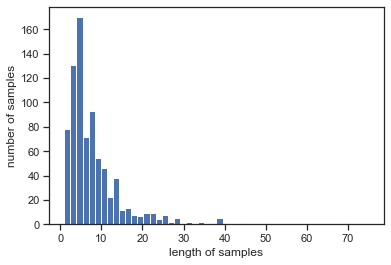

In [393]:
# 패딩
print('리뷰의 최대 길이 :',max(len(l) for l in X_train2))
print('리뷰의 평균 길이 :',sum(map(len, X_train2))/len(X_train2))
plt.hist([len(s) for s in X_train2], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [394]:
def below_threshold_len(max_len, nested_list):
    cnt = 0
    for s in nested_list:
        if(len(s) <= max_len):
            cnt = cnt + 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [395]:
max_len =25
below_threshold_len(max_len, X_train2)

전체 샘플 중 길이가 25 이하인 샘플의 비율: 96.125


In [396]:
X_train3 = pad_sequences(X_train2, maxlen = max_len)
X_test3 = pad_sequences(X_test2, maxlen = max_len)

In [346]:
# CNN으로 계산. 근데 이거는 긍정/부정 분류밖에 안됨. 그래서 포기.
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense, Input, Flatten, Concatenate
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [347]:
embedding_dim = 128
dropout_prob = (0.5, 0.8)
num_filters = 128

In [348]:
model_input = Input(shape = (max_len,))
z = Embedding(vocab_size, embedding_dim, input_length = max_len, name="embedding")(model_input)
z = Dropout(dropout_prob[0])(z)

In [349]:
conv_blocks = []

for sz in [3, 4, 5]:
    conv = Conv1D(filters = num_filters,
                         kernel_size = sz,
                         padding = "valid",
                         activation = "relu",
                         strides = 1)(z)
    conv = GlobalMaxPooling1D()(conv)
    conv = Flatten()(conv)
    conv_blocks.append(conv)

In [350]:
z = Concatenate()(conv_blocks) if len(conv_blocks) > 1 else conv_blocks[0]
z = Dropout(dropout_prob[1])(z)
z = Dense(128, activation="relu")(z)
model_output = Dense(1, activation="sigmoid")(z)

model = Model(model_input, model_output)
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["acc"])

In [351]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('CNN_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.fit(X_train3, y_train1, batch_size = 64, epochs=30, validation_data = (X_test3, y_test1), verbose=2, callbacks=[es, mc])

Epoch 1/100
13/13 - 2s - loss: -1.9501e+00 - acc: 0.0000e+00 - val_loss: -5.4441e+00 - val_acc: 0.0000e+00

Epoch 00001: val_acc improved from -inf to 0.00000, saving model to CNN_model.h5
Epoch 2/100
13/13 - 0s - loss: -1.9381e+01 - acc: 0.0000e+00 - val_loss: -3.8563e+01 - val_acc: 0.0000e+00

Epoch 00002: val_acc did not improve from 0.00000
Epoch 3/100
13/13 - 0s - loss: -9.2383e+01 - acc: 0.0000e+00 - val_loss: -1.6508e+02 - val_acc: 0.0000e+00

Epoch 00003: val_acc did not improve from 0.00000
Epoch 4/100
13/13 - 1s - loss: -3.2314e+02 - acc: 0.0000e+00 - val_loss: -5.3142e+02 - val_acc: 0.0000e+00

Epoch 00004: val_acc did not improve from 0.00000
Epoch 5/100
13/13 - 0s - loss: -9.2121e+02 - acc: 0.0000e+00 - val_loss: -1.4191e+03 - val_acc: 0.0000e+00

Epoch 00005: val_acc did not improve from 0.00000
Epoch 6/100
13/13 - 0s - loss: -2.2714e+03 - acc: 0.0000e+00 - val_loss: -3.2943e+03 - val_acc: 0.0000e+00

Epoch 00006: val_acc did not improve from 0.00000
Epoch 7/100
13/13 - 0


Epoch 00052: val_acc did not improve from 0.00000
Epoch 53/100
13/13 - 0s - loss: -6.9888e+07 - acc: 0.0000e+00 - val_loss: -7.0015e+07 - val_acc: 0.0000e+00

Epoch 00053: val_acc did not improve from 0.00000
Epoch 54/100
13/13 - 1s - loss: -7.5597e+07 - acc: 0.0000e+00 - val_loss: -7.5526e+07 - val_acc: 0.0000e+00

Epoch 00054: val_acc did not improve from 0.00000
Epoch 55/100
13/13 - 0s - loss: -8.1741e+07 - acc: 0.0000e+00 - val_loss: -8.1332e+07 - val_acc: 0.0000e+00

Epoch 00055: val_acc did not improve from 0.00000
Epoch 56/100
13/13 - 0s - loss: -8.7574e+07 - acc: 0.0000e+00 - val_loss: -8.7482e+07 - val_acc: 0.0000e+00

Epoch 00056: val_acc did not improve from 0.00000
Epoch 57/100
13/13 - 0s - loss: -9.5210e+07 - acc: 0.0000e+00 - val_loss: -9.3977e+07 - val_acc: 0.0000e+00

Epoch 00057: val_acc did not improve from 0.00000
Epoch 58/100
13/13 - 0s - loss: -1.0209e+08 - acc: 0.0000e+00 - val_loss: -1.0082e+08 - val_acc: 0.0000e+00

Epoch 00058: val_acc did not improve from 0.0

In [67]:
def color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl({:d},{:d}%, {:d}%)".format(np.random.randint(206,219),np.random.randint(75,100),np.random.randint(35,59)))

In [ ]:
lightwordcloud = WordCloud(background_color='white', 
                      width=480, height=480, 
                      font_path ="AppleGothic",
                     color_func = color_func).generate(txt)

plt.imshow(lightwordcloud)

In [68]:
from wordcloud import WordCloud
wc=WordCloud("C:\\Users\\Yuyeon PARK\\Desktop\\Nanumsquare_ac_TTF\\Nanumsquare_ac_TTF\\NanumSquare_acEB.ttf",
            background_color="white",
            width=1000,
            height=1000,
            max_words=50,
            max_font_size=300,
            color_func = color_func)

wc.generate_from_frequencies(words)
wc.to_file('wordcloud.png')

In [52]:
words=dict(available_counter.most_common())

In [53]:
words

{'상담': 485,
 '연결': 128,
 '통화': 100,
 '시간': 99,
 '카드': 88,
 '감사': 86,
 '화면': 84,
 '직원': 76,
 '친절': 75,
 '고객': 62,
 '상담사': 48,
 '전화': 47,
 '대기': 45,
 '회비': 40,
 '설명': 37,
 '터치': 36,
 '안내': 34,
 '응대': 34,
 '처리': 33,
 '답변': 31,
 '삼성': 31,
 '서비스': 31,
 '내용': 30,
 '바로': 30,
 '다른': 28,
 '회사': 25,
 '기분': 23,
 '이자': 21,
 '질문': 20,
 '매우': 19,
 '말투': 18,
 '음성': 18,
 '할부': 18,
 '문의': 17,
 '사용': 15,
 '디지털': 15,
 '혜택': 15,
 '생각': 14,
 '이용': 13,
 '선택': 13,
 '다시': 12,
 '부분': 12,
 '문자': 12,
 '입장': 12,
 '보험': 12,
 '메뉴': 12,
 '느낌': 11,
 '사항': 11,
 '방법': 11,
 '오늘': 10,
 '대해': 10,
 '해결': 10,
 '신속': 9,
 '골드': 9,
 '주말': 9,
 '이해': 9,
 '아주': 9,
 '처음': 9,
 '대한': 8,
 '불만': 8,
 '정말': 8,
 '회원': 8,
 '업무': 8,
 '조금': 8,
 '경우': 8,
 '항상': 8,
 '대답': 8,
 '확인': 8,
 '포인트': 8,
 '텔레콤': 8,
 '직접': 7,
 '목소리': 7,
 '읍니': 7,
 '문제': 7,
 '불편': 7,
 '연락': 7,
 '자동': 7,
 '보고': 7,
 '멘트': 7,
 '만족': 7,
 '감동': 7,
 '롯데': 7,
 '번호': 6,
 '부탁': 6,
 '주시': 6,
 '교육': 6,
 '먼저': 6,
 '요타': 6,
 '대출': 6,
 '방식': 6,
 '한도': 6,
 '이상': 5,
 '짜증': 5,
 '응답': 5,